In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

'2.13.0'

### Basic CNN Overview

In [ ]:
# loading the fashion mnist data and splitting into train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

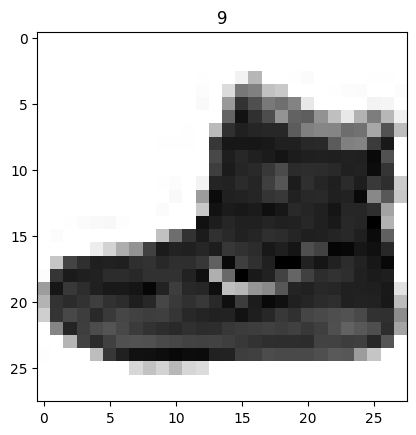

In [ ]:
# visualize the image data in the dataset
plt.imshow(X_train[0], cmap="binary")
plt.title(y_train[0]);

In [ ]:
# normalize the data
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# reshape to size (28, 28 , 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# see the new shapes of image sets
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
# one hot encode labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [ ]:
y_train.shape, y_train[:5]

(TensorShape([60000, 10]),
 <tf.Tensor: shape=(5, 10), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>)

In [ ]:
# building the model

#set tge random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# view the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
# fit the model on the training data
hist = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64
)

Epoch 1/5
938/938 [==============================] - 19s 5ms/step - loss: 0.5454 - accuracy: 0.8025
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3755 - accuracy: 0.8669
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3350 - accuracy: 0.8814
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3073 - accuracy: 0.8898
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2904 - accuracy: 0.8956


In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.8955


[0.2898232042789459, 0.8955000042915344]

### Transfer learning with tensorflow

The general idea of transfer learning is to use knowledge learned from tasks for which a lot of labelled data is available in settings where only little labelled data is available. Creating labelled data is expensive, so optimally leveraging existing datasets is key.

>**Transfer of knowledge and patterns is possible in a wide variety of domains**

Type of tranfer learning techniques:

1. Use pretrained model different data
2. Use as feature extractor and then add model it
3. Fine tune it for a give use case

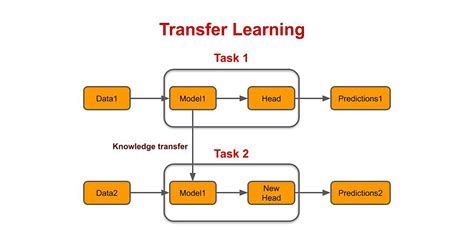

##### When to use each technique



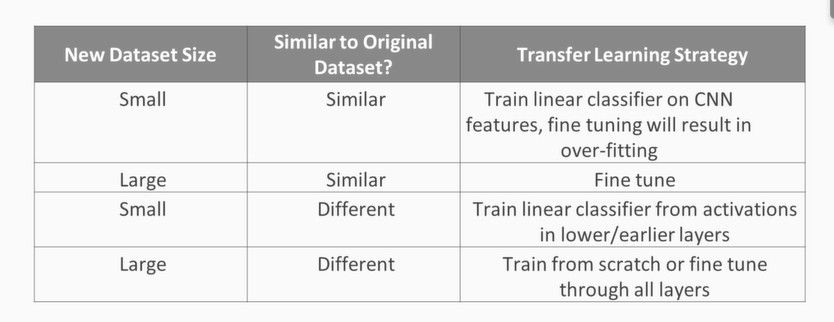

In [96]:
# load  model from avaiable ConvNets in tf.keras
vgg16_model = tf.keras.applications.VGG16(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top= True
)

553467096/553467096 [==============================] - 17s 0us/step


In [97]:
# visualize the architechture
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [98]:
# number of layers
len(vgg16_model.layers)

23

##### Use pretrained ConvNet to classify an image

In [99]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.applications.imagenet_utils import decode_predictions

In [100]:
def load_process_image(file_path):
  image_original =  load_img(file_path, target_size=(224,224))
  print("Image size after loading", image_original.size)

  image_array = img_to_array(image_original)
  print("Image size after converting to array", image_array.shape)

  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after converting to batch", image_batch.shape)


  # preprocess the images
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed



In [103]:
# set image file path
cat_image_file_path = "cat.jpg"

In [104]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after loading (224, 224)
Image size after converting to array (224, 224, 3)
Image size after converting to batch (1, 224, 224, 3)


In [105]:
# visualize the image data
# plt.imshow(cat_image_original)

In [106]:
# predict using the pretrained model (vgg16)
predictions = vgg16_model.predict(cat_image_preprocessed)

1/1 [==============================] - 1s 868ms/step


In [107]:
# see the prediction
predictions.shape

(1, 1000)

In [108]:
# these are prediction probabilites now we select the highes probability as the class
predicted_class = decode_predictions(predictions, top=1)

35363/35363 [==============================] - 0s 0us/step


In [109]:
predicted_class

[[('n02123394', 'Persian_cat', 0.3193186)]]

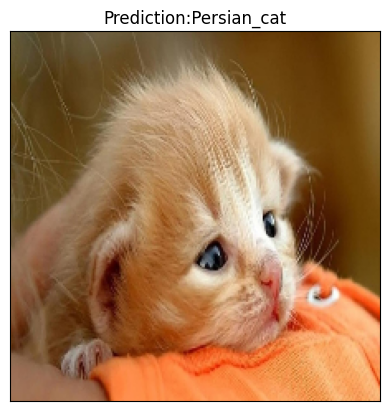

In [110]:
# show predicted image
plt.imshow(cat_image_original)
plt.title(f"Prediction:{predicted_class[0][0][1]}")
plt.xticks([])
plt.yticks([])
plt.show();

#### Feature Extractor
* base model = pre-trained model minus top(dense layers)
* freeze all the layers of the base model
* add classifier on top of the base model
* train on new datasets

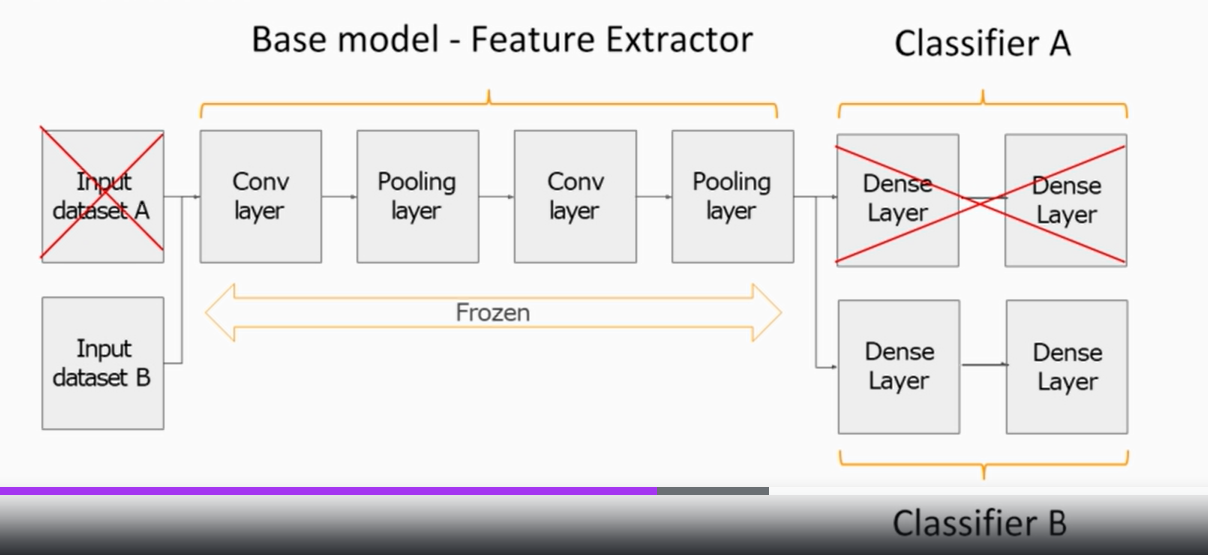

##### Data pipeline

In [111]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

import  tensorflow as tf
# tfds.disable_progress_bar()

In [112]:
# using mobilenetv2
from tensorflow.keras.applications import MobileNetV2

In [113]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name = 'tf_flowers',
    split=["train[:80%]", "train[80%:90%]" , "train[90%:]"],
    with_info=True,
    as_supervised=True
)

In [114]:
print('Total number of samples ', metadata.splits["train"].num_examples)

Total number of samples  3670


In [115]:
num_classes = metadata.features['label'].num_classes
num_train =  len(list(raw_train))
num_validation = len(list(raw_validation))
num_test = len(list(raw_test))

print("Number of classes:", num_classes)
print("Number of training samples:", num_train)
print("Number of validation samples:",  num_validation)
print("Number of test samples:", num_test)

Number of classes: 5
Number of training samples: 2936
Number of validation samples: 367
Number of test samples: 367


In [116]:
# Inspect datasets before data preprocessing
print(raw_train)
print(raw_validation)
print(raw_test)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [117]:
# Get labels / class names
class_names = np.array(metadata.features['label'].names)
print(class_names)

['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


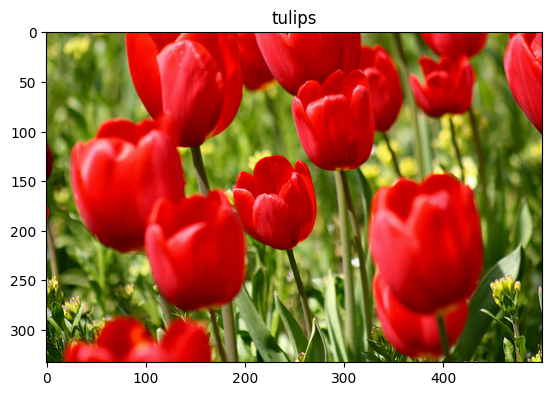

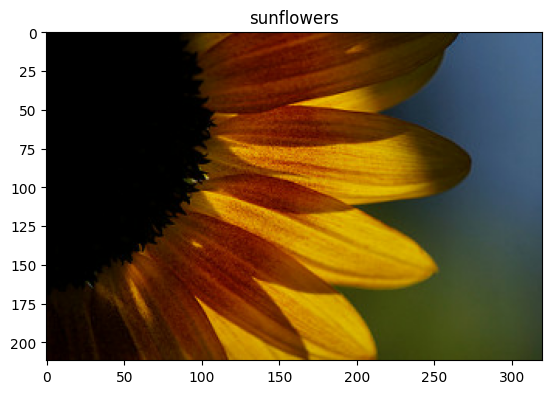

In [118]:
# visualize the data
label_names = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(label_names(label))

##### Image preprocessing

In [119]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

def format_example(image, label):
  image = tf.cast(image, dtype=tf.float32)
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  image = image / 255.
  return image, label

In [120]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [121]:
def augment_data(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
  image = tf.stack(image, axis=0)
  image = tf.image.random_crop(image, size=[IMG_SIZE,IMG_SIZE,3])
  return image, label

In [122]:
train = train.map(augment_data)

In [123]:
# shuffle and batch
BATCH_SIZE=32
SHUFFLE_BUFFER_SIZE= 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_batches = test.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [124]:
# inspect dataset after preprocessing
print(train_batches)
print(validation_batches)
print(test_batches)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [125]:
# Inspect a batch of data
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 224, 224, 3])

In [126]:
# training

# Set training parameters
NUM_EPOCHS = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = round(num_validation)//BATCH_SIZE

In [127]:
# Display training curves
def display_training_curves(history, title):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(NUM_EPOCHS)

  plt.plot(epochs_range, acc, label='Train accuracy')
  plt.plot(epochs_range, val_acc, label='Val accuracy')
  plt.title(title)
  plt.legend(loc='upper left')
  plt.figure()

  plt.show();

In [128]:
simple_cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [129]:
simple_cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 200704)            0         
                                                                 
 dense_11 (Dense)            (None, 64)               

In [130]:
# compile the model
simple_cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

In [131]:
# fit the model on training data
history = simple_cnn_model.fit(
    train_batches,
    epochs=NUM_EPOCHS,
    validation_data=validation_batches,
    batch_size=32
)

Epoch 1/10
92/92 [==============================] - 8s 59ms/step - loss: 1.6519 - accuracy: 0.3692 - val_loss: 1.1858 - val_accuracy: 0.4905
Epoch 2/10
92/92 [==============================] - 5s 51ms/step - loss: 1.2882 - accuracy: 0.4452 - val_loss: 1.1043 - val_accuracy: 0.5722
Epoch 3/10
92/92 [==============================] - 6s 53ms/step - loss: 1.2243 - accuracy: 0.4809 - val_loss: 1.1381 - val_accuracy: 0.5858
Epoch 4/10
92/92 [==============================] - 5s 49ms/step - loss: 1.1760 - accuracy: 0.5167 - val_loss: 1.1660 - val_accuracy: 0.5722
Epoch 5/10
92/92 [==============================] - 6s 52ms/step - loss: 1.1307 - accuracy: 0.5559 - val_loss: 1.1245 - val_accuracy: 0.6158
Epoch 6/10
92/92 [==============================] - 6s 57ms/step - loss: 1.0952 - accuracy: 0.5559 - val_loss: 1.0984 - val_accuracy: 0.6213
Epoch 7/10
92/92 [==============================] - 8s 70ms/step - loss: 1.0341 - accuracy: 0.5872 - val_loss: 1.0838 - val_accuracy: 0.6213
Epoch 8/10
92

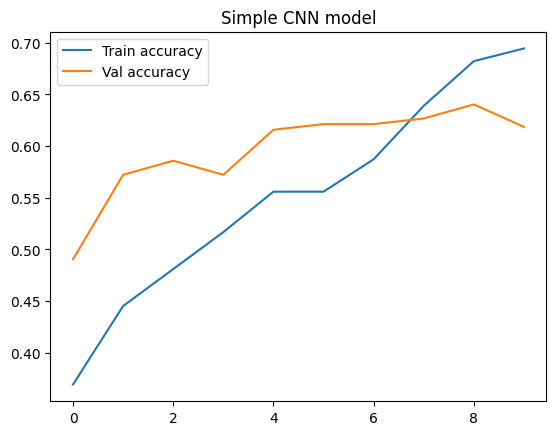

<Figure size 640x480 with 0 Axes>

In [132]:
# display the learning curve
display_training_curves(history, "Simple CNN model")

##### Adding to tranfer model

In [133]:
base_model = MobileNetV2(
    input_shape = IMG_SHAPE,
    weights="imagenet",
    include_top=False
)

In [134]:
base_model.trainable = False

In [135]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [136]:
# view architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 32)          368672    
                                                                 
 global_average_pooling2d_1  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2626821 (10.02 MB)
Trainable params: 368837 (1.41 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [137]:
# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

In [138]:
# fit the model on training data
history_2 = model.fit(
    train_batches,
    epochs=NUM_EPOCHS,
    validation_data=validation_batches,
    batch_size=32
)# fit the model on training data
history_2 = model.fit(
    train_batches,
    epochs=NUM_EPOCHS,
    validation_data=validation_batches,
    batch_size=32
)

Epoch 1/10
92/92 [==============================] - 12s 83ms/step - loss: 1.0106 - accuracy: 0.6703 - val_loss: 0.4732 - val_accuracy: 0.8474
Epoch 2/10
92/92 [==============================] - 7s 69ms/step - loss: 0.5908 - accuracy: 0.7824 - val_loss: 0.4570 - val_accuracy: 0.8283
Epoch 3/10
92/92 [==============================] - 8s 73ms/step - loss: 0.4826 - accuracy: 0.8195 - val_loss: 0.3618 - val_accuracy: 0.8883
Epoch 4/10
92/92 [==============================] - 8s 69ms/step - loss: 0.4248 - accuracy: 0.8416 - val_loss: 0.3780 - val_accuracy: 0.8856
Epoch 5/10
92/92 [==============================] - 7s 67ms/step - loss: 0.3892 - accuracy: 0.8559 - val_loss: 0.4752 - val_accuracy: 0.8501
Epoch 6/10
92/92 [==============================] - 6s 58ms/step - loss: 0.3655 - accuracy: 0.8658 - val_loss: 0.4679 - val_accuracy: 0.8638
Epoch 7/10
92/92 [==============================] - 6s 60ms/step - loss: 0.3411 - accuracy: 0.8702 - val_loss: 0.4976 - val_accuracy: 0.8719
Epoch 8/10
9

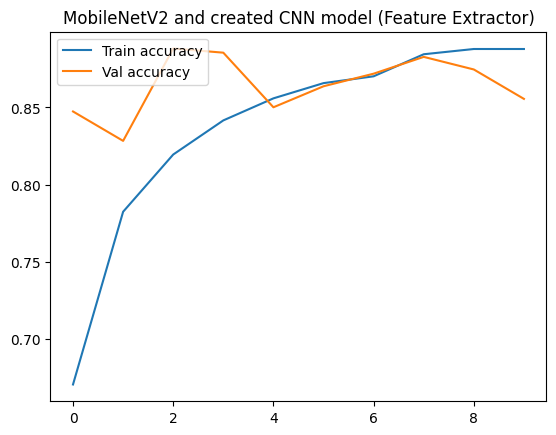

<Figure size 640x480 with 0 Axes>

In [139]:
# display the learning curve
display_training_curves(history_2, "MobileNetV2 and created CNN model (Feature Extractor)")

### Fine tuning

Using previous model and now update some weights of the base_model

In [139]:
# unfreeze all the layers in the base model
base_model.trainable = True

In [140]:
# see number of layers in the model that are trainable now
len(base_model.layers)

154

In [141]:
# fine_tune from layer onwards
fine_tune_at = 100

# freeze all the layers before `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =False

In [144]:
# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(1e-5),
                         metrics=["accuracy"])

In [145]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 32)          368672    
                                                                 
 global_average_pooling2d_1  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2626821 (10.02 MB)
Trainable params: 368837 (1.41 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [149]:
# fit the model on training data
history = model.fit(
    train_batches,
    initial_epoch=10,
    epochs=20,
    validation_data=validation_batches,
    batch_size=32
)

Epoch 11/20
92/92 [==============================] - 7s 66ms/step - loss: 0.2189 - accuracy: 0.9179 - val_loss: 0.4233 - val_accuracy: 0.8856
Epoch 12/20
92/92 [==============================] - 8s 73ms/step - loss: 0.2204 - accuracy: 0.9149 - val_loss: 0.4242 - val_accuracy: 0.8883
Epoch 13/20
92/92 [==============================] - 7s 71ms/step - loss: 0.2149 - accuracy: 0.9210 - val_loss: 0.4255 - val_accuracy: 0.8910
Epoch 14/20
92/92 [==============================] - 7s 63ms/step - loss: 0.2056 - accuracy: 0.9240 - val_loss: 0.4247 - val_accuracy: 0.8910
Epoch 15/20
92/92 [==============================] - 8s 73ms/step - loss: 0.1987 - accuracy: 0.9251 - val_loss: 0.4269 - val_accuracy: 0.8856
Epoch 16/20
92/92 [==============================] - 6s 60ms/step - loss: 0.1942 - accuracy: 0.9278 - val_loss: 0.4291 - val_accuracy: 0.8828
Epoch 17/20
92/92 [==============================] - 9s 84ms/step - loss: 0.2133 - accuracy: 0.9189 - val_loss: 0.4280 - val_accuracy: 0.8801
Epoch 

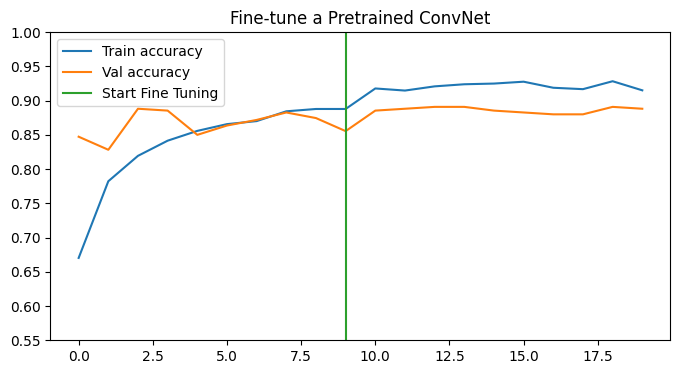

In [151]:
history_fine = history
history  = history_2 # clean this part up later

# display the learning curve

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.figure(figsize=(8, 4))

plt.plot(acc, label='Train accuracy')
plt.plot(val_acc, label='Val accuracy')
plt.ylim([0.8, 1])
plt.plot([NUM_EPOCHS-1, NUM_EPOCHS-1], plt.ylim(ymin=0.55), label='Start Fine Tuning')
plt.title("Fine-tune a Pretrained ConvNet")
plt.legend(loc='upper left')

plt.show()



In [152]:
# evaluate on testing data
score = model.evaluate(test_batches, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9100817441940308


In [153]:
# visualize the predictions
image_batch, label_batch = next(iter(test_batches))

image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_class_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_class_ids]

1/1 [==============================] - 1s 790ms/step


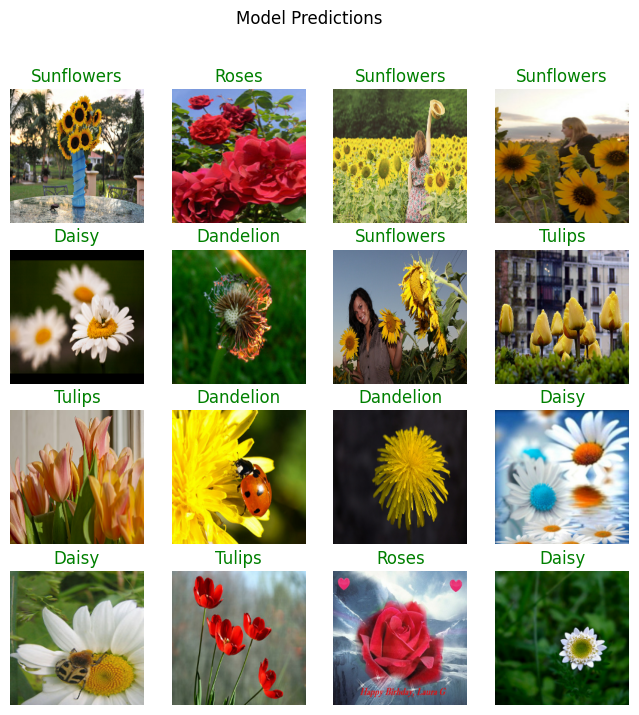

In [154]:
plt.figure(figsize=(8, 8))

# Display 16 test images with predictions
for i in range(16):
  plt.subplot(4, 4, i+1)
  # Display each image
  plt.imshow(image_batch[i])
  # Set title color: green if prediction correct and red if prediction incorrect
  title_color = "green" if predicted_class_ids[i] == label_batch[i] else "red"
  plt.title(predicted_class_names[i].title(), color=title_color)
  plt.axis('off')

_ = plt.suptitle("Model Predictions")